In [2]:
import math
import random
import pickle
import itertools
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error 
from sklearn.utils import shuffle
from scipy.signal import resample
import matplotlib.pyplot as plt
np.random.seed(42)
from sklearn.preprocessing import OneHotEncoder
from keras.models import Model
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, Softmax, Add, Flatten, Activation# , Dropout
from keras import backend as K
#from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
np.random.seed(42)
import tensorflow as tf
import tensorflow.keras as keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [3]:
mit_test_data = pd.read_csv("mitbih_test.csv", header=None)
mit_train_data = pd.read_csv("mitbih_train.csv", header=None)

In [4]:
print("--- X ---")
X = mit_train_data.loc[:, mit_train_data.columns != 187]
print(X.head())
print(X.info())

--- X ---
        0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  177  178  179  180  181  182  183  184  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   185  186  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3 

In [5]:
summary = mit_train_data.describe()
print(summary)

                0             1             2             3             4    \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.890360      0.758160      0.423972      0.219104      0.201127   
std        0.240909      0.221813      0.227305      0.206878      0.177058   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.921922      0.682486      0.250969      0.048458      0.082329   
50%        0.991342      0.826013      0.429472      0.166000      0.147878   
75%        1.000000      0.910506      0.578767      0.341727      0.258993   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                5             6             7             8             9    \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.210399      0.205808      0.201773      0.198691      0.196757   
std        0.171909      0.178481      0.177240    

In [4]:
print("--- Y ---")
y = mit_train_data.loc[:, mit_train_data.columns == 187]
print(y.head())
print(y.info())

--- Y ---
   187
0  0.0
1  0.0
2  0.0
3  0.0
4  0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   187     87554 non-null  float64
dtypes: float64(1)
memory usage: 684.1 KB
None


In [5]:
print("--- testX ---")
testX = mit_test_data.loc[:, mit_test_data.columns != 187]
print(testX.head())
print(testX.info())

--- testX ---
        0         1         2         3         4         5         6    \
0  1.000000  0.758264  0.111570  0.000000  0.080579  0.078512  0.066116   
1  0.908425  0.783883  0.531136  0.362637  0.366300  0.344322  0.333333   
2  0.730088  0.212389  0.000000  0.119469  0.101770  0.101770  0.110619   
3  1.000000  0.910417  0.681250  0.472917  0.229167  0.068750  0.000000   
4  0.570470  0.399329  0.238255  0.147651  0.000000  0.003356  0.040268   

        7         8         9    ...  177  178  179  180  181  182  183  184  \
0  0.049587  0.047521  0.035124  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.307692  0.296703  0.300366  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.123894  0.115044  0.132743  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.004167  0.014583  0.054167  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.080537  0.070470  0.090604  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   185  186  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0 

In [6]:
print("--- testy ---")
testy = mit_test_data.loc[:, mit_test_data.columns == 187]
#testy = test_df.loc[:, mit_test_data.columns == 187]
print(testy.head())
print(testy.info())

--- testy ---
   187
0  0.0
1  0.0
2  0.0
3  0.0
4  0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   187     21892 non-null  float64
dtypes: float64(1)
memory usage: 171.2 KB
None


(array([72471.,     0.,  2223.,     0.,     0.,  5788.,     0.,   641.,
            0.,  6431.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

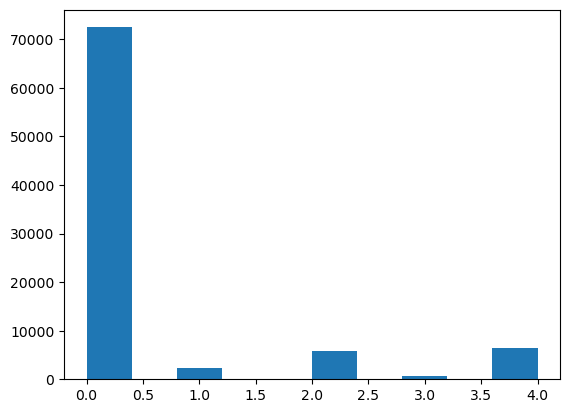

In [7]:
plt.hist(mit_train_data.iloc[:,187])

In [8]:
mit_train_data[187]=mit_train_data[187].astype(int)
data=mit_train_data[187].value_counts()
print(data)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


In [10]:
import time
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
# Create an empty list train_scores_models
test_scores_models = []

# Create an empty list of models
models = []
accuracy = []

print("------------------------SVM------------------------")

start = time.time()    
svm = SVC(kernel = 'linear', C = 2).fit(X, y)
print('Accuracy of SVC is', svm.score(testX, testy))
end = time.time()
print(f'SVC took {end-start} seconds to run\n')
y_pred = svm.predict(testX)
# add accuracy value for SVM
test_scores_models.append(accuracy_score(testy, y_pred))
test_scores_models

# add model to the list
models.append('SVM')
models



------------------------SVM------------------------


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of SVC is 0.921021377672209
SVC took 673.8270771503448 seconds to run



['SVM']

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     18118
         1.0       0.91      0.47      0.62       556
         2.0       0.82      0.29      0.42      1448
         3.0       0.66      0.36      0.47       162
         4.0       0.98      0.87      0.92      1608

    accuracy                           0.92     21892
   macro avg       0.86      0.60      0.68     21892
weighted avg       0.92      0.92      0.91     21892



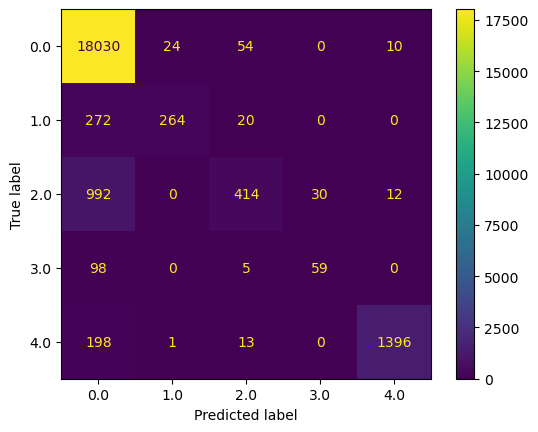

In [11]:
ysvm_pred = svm.predict(testX) 

print(classification_report(testy, ysvm_pred))
cm2 = confusion_matrix(testy, ysvm_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels = svm.classes_)
disp.plot()
plt.show()

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
testX = scaler.transform(testX)

print("------------------------KNN------------------------")
start = time.time()
knn = KNeighborsClassifier(n_neighbors = 3).fit(X, y)
print('Accuracy of KNN is', knn.score(testX, testy))
end = time.time()

y_pred = knn.predict(testX)
# add accuracy value for KNN
test_scores_models.append(accuracy_score(testy, y_pred))
test_scores_models

# Calculate the accuracy of the classifier
accuracy = accuracy_score(testy, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
end = time.time()  
print(f'KNN took {end-start} seconds to run\n')


# add model to the list
models.append('KNN')
models

------------------------KNN------------------------


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy of KNN is 0.9755161702905171
Accuracy: 97.55%
KNN took 7.860562324523926 seconds to run



['SVM', 'KNN']

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     18118
         1.0       0.88      0.67      0.76       556
         2.0       0.94      0.90      0.92      1448
         3.0       0.79      0.69      0.74       162
         4.0       1.00      0.96      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.92      0.84      0.88     21892
weighted avg       0.97      0.98      0.97     21892



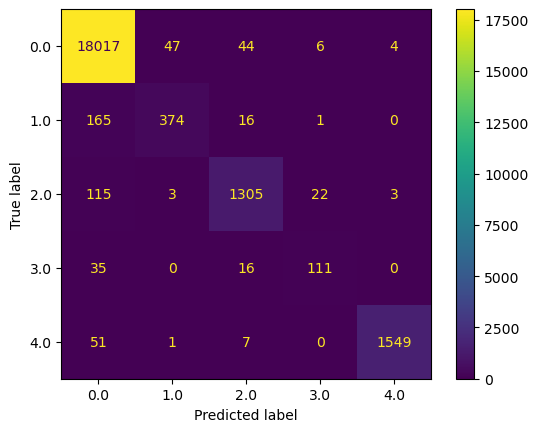

In [13]:
yknn_pred = knn.predict(testX) 
print(classification_report(testy, yknn_pred))
cm = confusion_matrix(testy, yknn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)
disp.plot()
plt.show()

In [14]:
print("------------------------DECISION TREE------------------------")
start = time.time()
dt = DecisionTreeClassifier(max_depth = 9).fit(X, y)
print('Accuracy of Decision Tree is', dt.score(testX, testy))
end = time.time()    
print(f'Decision Tree took {end-start} seconds to run\n')

# add accuracy value for DECISION TREE
test_scores_models.append(accuracy_score(testy, y_pred))
test_scores_models

# add model to the list
models.append('DECISION TREE')
models

------------------------DECISION TREE------------------------
Accuracy of Decision Tree is 0.9535446738534624
Decision Tree took 8.289265871047974 seconds to run



['SVM', 'KNN', 'DECISION TREE']

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     18118
         1.0       0.85      0.52      0.65       556
         2.0       0.94      0.77      0.84      1448
         3.0       0.60      0.36      0.45       162
         4.0       0.98      0.88      0.93      1608

    accuracy                           0.95     21892
   macro avg       0.87      0.70      0.77     21892
weighted avg       0.95      0.95      0.95     21892



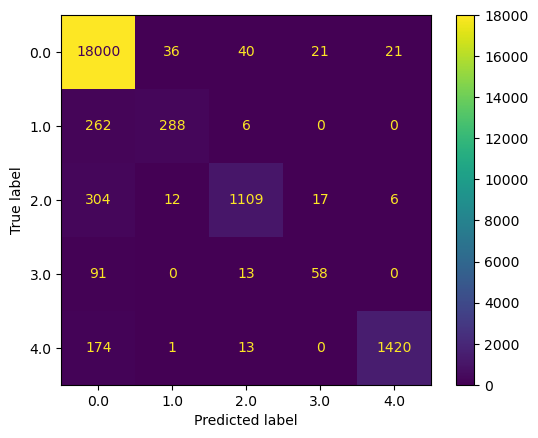

In [15]:
ydt_pred = dt.predict(testX) 
print(classification_report(testy, ydt_pred))
cm = confusion_matrix(testy, ydt_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt.classes_)
disp.plot()
plt.show()

In [17]:
test_scores_models

[0.921021377672209, 0.9755161702905171, 0.9755161702905171]

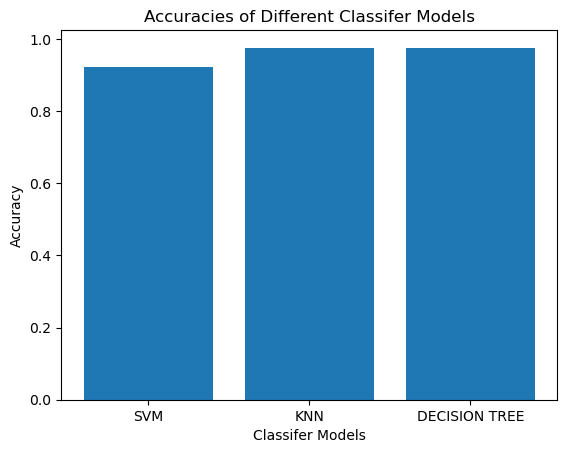

In [16]:
plt.title('Accuracies of Different Сlassifer Models')    
plt.bar(models, test_scores_models)
plt.xlabel('Сlassifer Models')
plt.ylabel('Accuracy')
plt.show()